# Сборный проект 1. Исследование данных о продажах игр интернет-магазина "Стримчик"

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура **ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. **ESRB** оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

# Описание данных
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Инструкция по выполнению проекта

## Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv.

Для начала импортируем все необходимые для дальнейшей работы библиотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

Затем импортируем датасет.

In [2]:
pd.set_option('display.max_columns', None)

try:
    data_fresh = pd.read_csv('games.csv')
except:
    data_fresh = pd.read_csv('/datasets/games.csv')
#загружаем данные из файла в датафрейм data

In [3]:
data = data_fresh.copy() #создаем копию датасета

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



## Шаг 2. Подготовьте данные



### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = map(str.lower, data.columns)

Проверим, изменились ли названия столбцов. 

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему


Выведем общую информацию о датасете. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Необходимо изменить тип данных в двух столбцах: год выпуска игры и оценка пользователей. 
Год выпуска необходимо преобразовать в целочисленное значение, так как год не может быть не целым. 
Оценка пользователей почему-то записана в виде строчных значений, необходимо заменить на тип float. 

Здесь важно отметить, что в столбце с датой релиза игры есть пропущенные значения, которые могут помешать изменению типа данных. Посмотрим, много ли пропусков.  

In [10]:
(len(data[data['year_of_release'].isna() == True])/len(data))*100

1.609332934489979

Пропущенные значения в столбце с датой релиза игры составляют всего 1,6 процента от всех данных. Их можно со спокойной душой удалить. 

In [11]:
data = data[data['year_of_release'].isna() == False]
data['year_of_release'].isna().sum()

0

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

В столбце с оценками критиков также есть пропущенные значения. 

In [14]:
(len(data[data['critic_score'].isna() == True])/len(data))*100

51.45932141554177

Однако пропущенные значения составляют больше половины от всего датасета. Их нельзя удалять. Так что в этом столбце мы изменим тип данных после обработки пропусков. 

In [15]:
(len(data[data['user_score'].isna() == True])/len(data))*100

40.1739024686854

In [16]:
(len(data[data['user_score'] == 'tbd'])/len(data))*100

14.447282013863552

В столбце с оценками пользователей тоже очень много пропущенных значений, которые нельзя удалять. Тип данных данного столбца будет также изменен после обработки пропусков. 

### Обработайте пропуски при необходимости:

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим, сколько пропущенных значений есть в датасете по стобцам. 

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [21]:
len(data[(data['name'].isna() == True) | (data['genre'].isna() == True)])/len(data)*100

0.012161011796181443

Пропущенные значения в жанре и названии игры составляют меньше 1 процента от датасета. Их можно просто удалить. 

In [22]:
data[(data['name'].isna() == True) | (data['genre'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
data = data[(data['name'].isna() == False) | (data['genre'].isna() == False)]

In [24]:
len(data)/len(data_fresh)*100

98.37870176488184

В столбцах с оценками пользователей слишком много пропусков.

In [25]:
data[(data['critic_score'].isna() == True) & (data['user_score'].isna() == True) & (data['rating'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Отметим на будущее, что больше 6000 пропусков приходится одновременно на столбцы с оценками критиков и пользователей, а также на столбец с рейтингом. 

In [26]:
data['rating'] = data['rating'].fillna('undefined')

In [27]:
data['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Здесь также важно отметить, что рейтинг RP означает, что рейтинг еще не проставлен. Не будем его мешать с undefined, но запомним на будущее. 

In [28]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выведем строки со значением "tbd". 

In [29]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Изменим тип данных в столбцах, меняя все неккоректные значения на Nan. 

In [30]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [31]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [32]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать

Строки с пропусками в столбце с информацией о годе релиза игры были удалены, так как составляли меньше 1 процента от общего датасета, по той же причине были удалены строки с пропущенными значениями в столбце с жанром игры и названием. Пропущенные значения в рейтинге игры были заменены на 'undefined', пропущенные значения в оценказ критиков и пользователей были оставлены, так как они могут также предоставить какую-то полезную для анализа информацию. 

#### Опишите причины, которые могли привести к пропускам

In [35]:
data_fresh[(data_fresh['Genre'].isna() == True) | (data_fresh['Name'].isna() == True)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названии и жанре были допущены в одних и тех же строках. Данные игры были выпущены в 1993 году, названия игры не сохранились. Скорее всего, просто данные тогда не были заполнены до конца. Игра была выпущена давно. Данные могли не сохраниться. 

In [36]:
data_fresh[(data_fresh['Genre'].isna() == True) | (data_fresh['Name'].isna() == True) | (data_fresh['Year_of_Release'].isna() == True)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные для датасета брались из открытых источников, поэтому данные в столбце с годом релиза могли быть допущены либо из-за отсутствия информации в источнике, либо из-за неточной или непонятной информации в источнике. 

#### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

Как уже говорилось выше, значение 'tbd' в столбце с оценкой пользователей обозначает, что оценка все еще формируется. Данное значение было заменено на Nan, так как по сути также представляет собой "отсутствие информации". 

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [37]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [38]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [39]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [40]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [41]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [42]:
data['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В данном случае уникальных значений в некоторых из столбцов не так много, поэтому не все из них буду приводить к нижнему регистру. Мне удобнее будет привести к нижнему регистру лишь столбцы 'name' и 'genre'. 

In [43]:
data['name'] = data['name'].str.lower()

In [44]:
data['genre'] = data['genre'].str.lower()

Перейдем непосредственно к поиску дубликатов. 

In [45]:
data.duplicated().sum()

0

Явных дубликатов нет. 

In [46]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB



## Шаг 3. Проведите исследовательский анализ данных


### Посмотрите, сколько игр выпускалось в разные годы. 
Важны ли данные за все периоды?

In [47]:
games_by_year = data.groupby('year_of_release')['name'].count()
games_by_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Целесообразнее взять период примерно с 2000-го года, во-первых, чтобы учитывать несколько циклов мировых экономических кризисов. Во-вторых, некоторые платформы для игр появились лишь в 90-е - 20-е, например, популярные сейчас Xbox и PS.   
Но если рассматривать весь период, то после 1994 года количество выпущенных игр начало увеличиваться в несколько раз ежегодно, после 2005 года количество выпущенных игр в год достигло значения в тысячу (по сравнению с 121 игрой за 1994 год). Хотя здесь все же также следует учитывать тот факт, что в 90-е могли не вести запись всех выпущенных игр или информация могла затеряться. Тем не менее с 2011 года наметился спад количества выпущенных игр.    

Для упрощения дальнейшего анализа создадим датасет, где период времени ограничен 1999-2016 годами. 

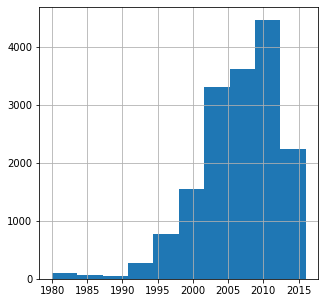

In [48]:
data['year_of_release'].hist(figsize=(5, 5));

In [49]:
data_1999 = data[data['year_of_release'] >= 1999]

In [50]:
len(data_1999)/len(data_fresh)*100

88.591085851032

Новый датасет составляет 89% от изначального, так что на данных не сильно отразится данное изменение. 

### Посмотрите, как менялись продажи по платформам
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [51]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [52]:
sales_per_platform_top = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [53]:
sales_per_platform_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [54]:
sales_per_platform_top['total_sales'].quantile(0.75)

301.20499999999674

Рассмотрим топ 10 платформ. 

In [55]:
sales_per_platform = (data.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum') \
                      .reset_index())

In [56]:
sales_per_platform

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
233,2016,PSV,4.25
234,2016,Wii,0.18
235,2016,WiiU,4.60
236,2016,X360,1.52


In [57]:
sales_per_platform_top = sales_per_platform[(sales_per_platform['platform'] == 'PS2') | (sales_per_platform['platform'] == 'X360') | (sales_per_platform['platform'] == 'PS3') | (sales_per_platform['platform'] == 'Wii') | (sales_per_platform['platform'] == 'DS') | (sales_per_platform['platform'] == 'PS') | (sales_per_platform['platform'] == 'PS4') | (sales_per_platform['platform'] == 'GBA') | (sales_per_platform['platform'] == 'PSP') | (sales_per_platform['platform'] == '3DC')]

In [58]:
sales_per_platform_top

,year_of_release,platform,total_sales
8,1985,DS,0.02
47,1994,PS,6.03
55,1995,PS,35.96
64,1996,PS,94.70
70,1997,PS,136.17
...,...,...,...
227,2015,X360,11.96
231,2016,PS3,3.60
232,2016,PS4,69.25
234,2016,Wii,0.18


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

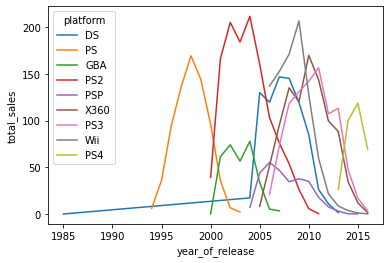

In [59]:
sns.lineplot(data = sales_per_platform_top, x = 'year_of_release', y = 'total_sales', hue = 'platform')

Исходя из графика, построенного выше, можно сделать вывод о том, что большинство новых платформ крайне быстро набирают популярность, но в течение 6-10 лет их популярность так же быстро снижается при выходе новой платформы. 

In [60]:
sales_per_platform_top[sales_per_platform_top['platform'] == 'DS']

,year_of_release,platform,total_sales
8,1985,DS,0.02
121,2004,DS,17.27
128,2005,DS,130.14
136,2006,DS,119.81
147,2007,DS,146.94
158,2008,DS,145.31
166,2009,DS,119.54
173,2010,DS,85.02
181,2011,DS,26.18
190,2012,DS,11.01


In [61]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


In [62]:
data[(data['platform'] != 'DS') | ((data['platform'] == 'DS') & (data['year_of_release'] != 1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


Удалим строчку с платформой DS  в 1985 году. Суммарные продажи не такие большие, на анализ сильно не повлияет. 

In [63]:
data = data[(data['platform'] != 'DS') | ((data['platform'] == 'DS') & (data['year_of_release'] != 1985))]

### Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


В дальнейшем в работе будет рассматриваться период с 2014 года. 

In [65]:
data = data[data['year_of_release'] >= 2014]

### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

Тремя самыми прибыльными платформами являются: PlayStation, Wii, и Xbox. Важно отметить, что у них не только самые высокие продажи, но также у PS И Xbox новые, улучшенные модели выходят довольно часто. 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Опишите результат.

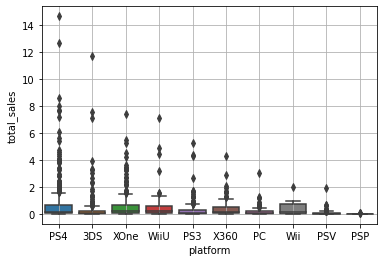

In [70]:
sns.boxplot(x=data['platform'], y=data['total_sales'])
plt.grid()

Ограничим графики по оси ординат, чтобы было лучше видно сами боксплоты. 

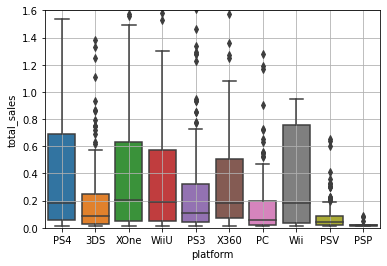

In [71]:
sns.boxplot(x=data['platform'], y=data['total_sales'])
plt.ylim([0,1.6])
plt.grid()

Из графика выше видно, что у 5 платформ самое высокое медианное значение по суммарным продажам за последние три года: PS4 (199 000 проданных копий), XOne (210 000 проданных копий), WiiU (200 000 проданных копий), X360(199 000 п.к.) и Wii (200 000 п.к.). Тем не менее размах значений у 5 платформ разный. У PS4 и XOne самый большой размах значений, причем датасет скошен вправо, то есть в сторону б**о**льших значений. В то же время у данных платформ крайне больших выбросов (в особенности у PS4). Однако у Wii межквартильный размах больше межквартильного размаха PS4 и XOne, что говорит о том, что 50% продаж у Wii было приблизительно от 30 000 до 750 000 проданных копий, в то время как межквартильные размахи PS4 и XOne ограничены 700 000 и 640 000 проданных копий соответственно.  

**Исходя из графика выше, можно сделать вывод о том, что наиболее прибыльной и выгодной платформой является PS4.** 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

In [72]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Возьмем три самые популярные платформы и две не популярную для сравнения. 

In [73]:
corr_platforms = ['PS4', 'Wii', 'XOne', 'PC', '3DS']

In [74]:
for pl in corr_platforms:
    print(pl)
    print('critic_score')
    print(data.query('platform == @pl')['total_sales'].corr(data.query('platform == @pl')['critic_score']))
    print('user_score')
    print(data.query('platform == @pl')['total_sales'].corr(data.query('platform == @pl')['user_score']))
    print(' ')

PS4
critic_score
0.40266141068104083
user_score
-0.040131589472697356
 
Wii
critic_score
nan
user_score
1.0
 
XOne
critic_score
0.42867694370333226
user_score
-0.0703839280647581
 
PC
critic_score
0.17463413769350036
user_score
-0.07159665703472452
 
3DS
critic_score
0.31411749286905105
user_score
0.2151932718527028
 


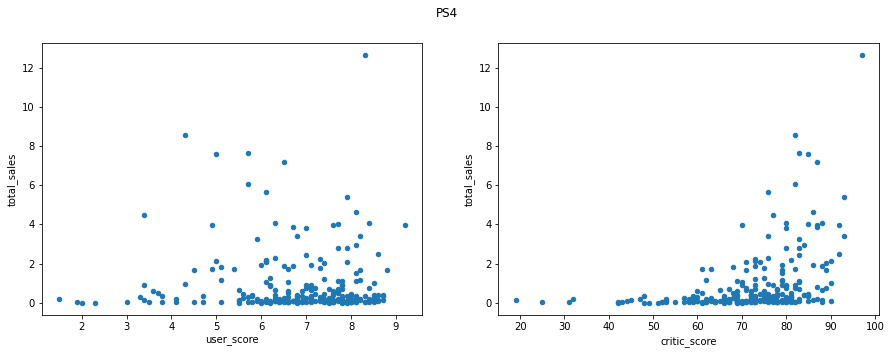

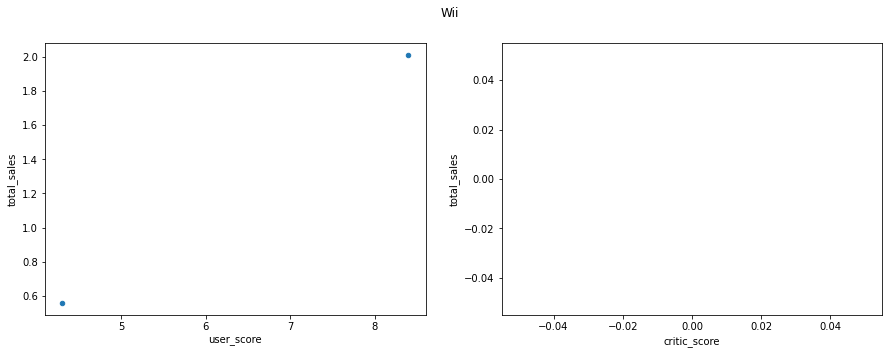

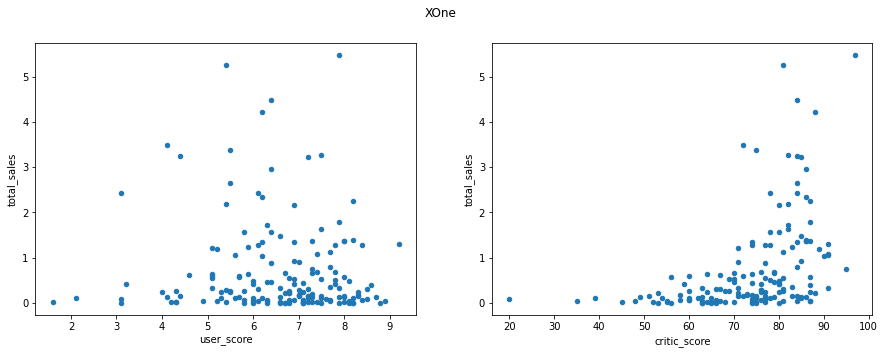

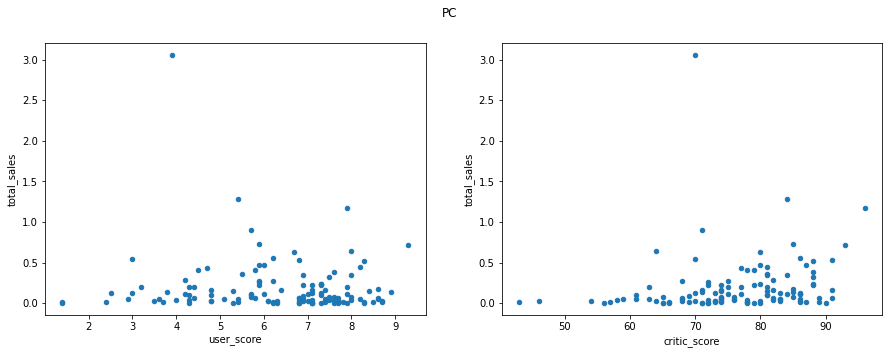

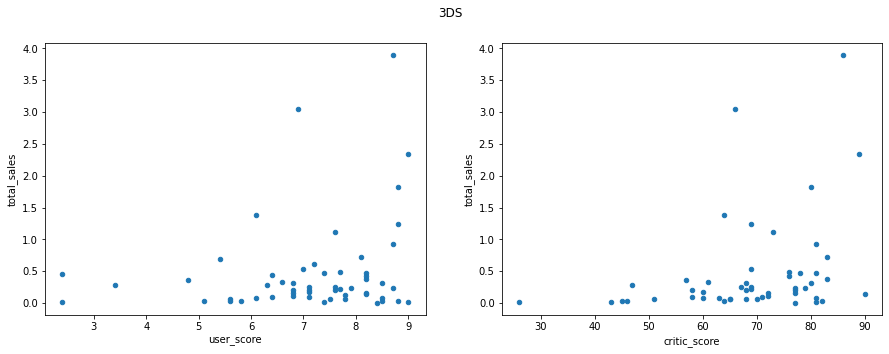

In [75]:
for pl in corr_platforms:
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax = ax.ravel()
    data.query('platform == @pl').plot(kind='scatter', x='critic_score', y='total_sales', ax = ax[1])
    data.query('platform == @pl').plot(kind='scatter', x='user_score', y='total_sales', ax = ax[0])
    fig.suptitle(pl)

У суммарных продаж и оценок пользователей сравнительно небольшой коэффициент корреляции, не больше 0.01 у большинства платформ. Однако важно отметить, что коэффициент отрицательный. То есть, чем больше выше пользовательская оценка, тем больше суммарные продажи, и наоборот. Зависимость суммарных продаж от оценки критиков немного выше (до 0.4). Но если смотреть на графики, то можно увидеть, что у большинства платформ корреляция суммарных продаж с оценками критиков становится тем сильнее, чем выше оценка.То есть высокие оценки вполне могут повлиять на продажи, но утверждать наверняка в данном случае нельзя. 
Если сравнивать популярные и не популярные платформы, то коэффициент корреляции у них отличается, но не настолько сильно, чтобы можно было выявить какую-либо значимую закономерность. 

### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [76]:
data.groupby('genre')['name'].count().sort_values()

genre
puzzle           14
strategy         37
platform         38
simulation       44
fighting         60
racing           69
misc            113
shooter         128
sports          161
adventure       185
role-playing    221
action          619
Name: name, dtype: int64

Самый популярный жанр: action, спортивные, игры вне категории (misc), ролевые, приключенческие и шутеры. 

In [77]:
data_by_genre = data.groupby('genre').agg({'total_sales':['sum', 'count']})
data_by_genre

total_sales      
                     sum count
genre                         
action            199.36   619
adventure          17.55   185
fighting           28.22    60
misc               37.55   113
platform           18.09    38
puzzle              2.21    14
racing             27.52    69
role-playing      101.44   221
shooter           170.94   128
simulation         13.13    44
sports            109.48   161
strategy            3.96    37

In [78]:
data_by_genre['share'] = (data_by_genre['total_sales']['sum'] / data_by_genre['total_sales']['count'])*100
data_by_genre.sort_values(by='share')

total_sales             share
                     sum count            
genre                                     
adventure          17.55   185    9.486486
strategy            3.96    37   10.702703
puzzle              2.21    14   15.785714
simulation         13.13    44   29.840909
action            199.36   619   32.206785
misc               37.55   113   33.230088
racing             27.52    69   39.884058
role-playing      101.44   221   45.900452
fighting           28.22    60   47.033333
platform           18.09    38   47.605263
sports            109.48   161   68.000000
shooter           170.94   128  133.546875

Наиболее прибыльными жанрами являются шутер, платформер, ролевой и спортивный. Наименее прибыльные: приключенческий, стратегия и головоломка. 

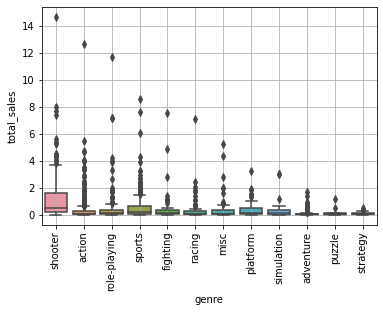

In [79]:
sns.boxplot(x=data['genre'], y=data['total_sales'])
plt.xticks(rotation=90)
plt.grid()

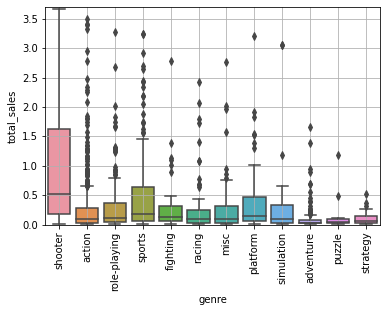

In [80]:
sns.boxplot(x=data['genre'], y=data['total_sales'])
plt.xticks(rotation=90)
plt.ylim([0,3.7])
plt.grid()

Самое высокое медианное значение суммарных продаж у такого жанра, как шутер. Кроме того, именно у этого жанра самый большой размах (и межквартильный размах). Значение третьего квартиля достигает приблизительно 1.7 млн. проданных копий. Более того, у шутера также немалое количество выбросов больших значений и датасет скошен впарво. 
Намного меньше по размеру межквартильного размаха суммарные продажи спортивного жанра, третий квартиль которого достигает лишь 650 000 проданных копий. Однако у спортивного жанра большой ус больших значений, датасет скошен вправо и есть большое количество выбросов больших значений, что говорит о том, что довольно часто продажи спортивных игр выше медианного значения. 
Третьим самым прибыльным жанром является платформер с медианным значением в 150-200 тыс. проданных копий. Однако у данного жанра также довольно большой правый ус, датасет скошен вправо и есть некоторые выбросы больших значений. 
Интересно также рассмотреть такой жанр, как экшн, у которого довольно маленьких межквартильный размах, в сравнении с топ-3 жанрами, однако у этого жанра огромное количество выбросов больших значений. 

## Шаг 4. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):



#### - Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [81]:
plat_na = data.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
plat_na_top = plat_na.head()
plat_na_top.loc['Other', 'na_sales'] = plat_na.iloc[5:].sum()[0]

/tmp/ipykernel_608/1830277117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_na_top.loc['Other', 'na_sales'] = plat_na.iloc[5:].sum()[0]


In [82]:
plat_eu = data.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
plat_eu_top = plat_eu.head()
plat_eu_top.loc['Other', 'eu_sales'] = plat_eu.iloc[5:].sum()[0]

/tmp/ipykernel_608/1505109696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_eu_top.loc['Other', 'eu_sales'] = plat_eu.iloc[5:].sum()[0]


In [83]:
plat_jp = data.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
plat_jp_top = plat_jp.head()
plat_jp_top.loc['Other', 'jp_sales'] = plat_jp.iloc[5:].sum()[0]

/tmp/ipykernel_608/1240090075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_jp_top.loc['Other', 'jp_sales'] = plat_jp.iloc[5:].sum()[0]


Text(0.5, 0.98, 'Доли продаж по платформам в регионах')

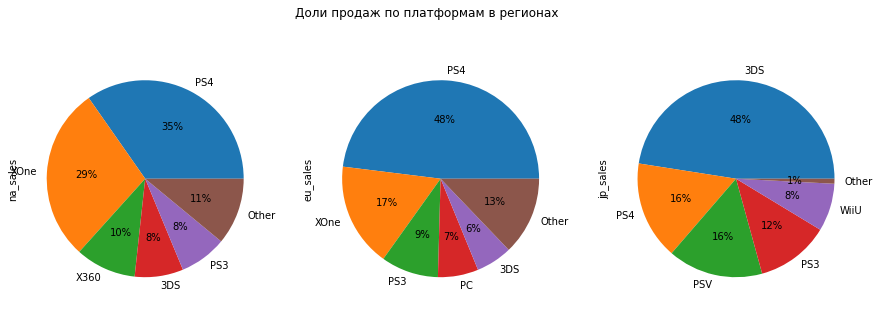

In [84]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax = ax.ravel()
plat_na_top.plot(kind='pie', y='na_sales', legend=False, autopct='%.0f%%', ax = ax[0])
plat_eu_top.plot(kind='pie', y='eu_sales', legend=False, autopct='%.0f%%', ax = ax[1])
plat_jp_top.plot(kind='pie', y='jp_sales', legend=False, autopct='%.0f%%', ax = ax[2])
fig.suptitle('Доли продаж по платформам в регионах')

Наибольшая доля продаж в Северной Америке приходится на такие платформы, как: PS4, XOne, X360, 3DS и PS3 составляя 35%, 29%, 10%, 8% и 8% соответственно. Наиболее популярной платформой является PS4. В Европе также самой популярной платформой является PS4 (48%), после нее XOne (17%), PS3 (9%), PC (7%), затем 3DS (6%). Лидеры платформ в Европе не сильно отличаются от лидеров в Северной Америке, но в Северной Америке X360 популярнее PS3. В Японии лидером является 3DS, доля продаж с которой составляет 48%. После нее идут PS4(16%), PSV (16%), PS3 (12%) и WiiU (8%). В Японии бесспорным лидером является 3DS, в отличие от СА и Европы, где лидером является PS4. 

Рассмотрим также популярные платформы в других регионах. 

/tmp/ipykernel_608/942079031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_ot_top.loc['Other', 'other_sales'] = plat_ot.iloc[5:].sum()[0]


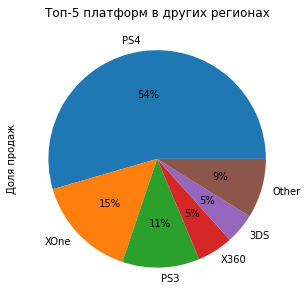

In [85]:
plat_ot = data.groupby('platform').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)
plat_ot_top = plat_ot.head()
plat_ot_top.loc['Other', 'other_sales'] = plat_ot.iloc[5:].sum()[0]
plat_ot_top.plot(kind='pie', y='other_sales', legend=False, figsize=(5,5), autopct='%.0f%%')
plt.title('Топ-5 платформ в других регионах')
plt.ylabel('Доля продаж')
plt.show()

В других регионах PS4 также является одной из наиболее популярных платформ (54%). В топ-5 платформ также входит XOne, PS3, X360 и 3DS. 

#### - Самые популярные жанры (топ-5). Поясните разницу.

In [86]:
genre_na = data.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
genre_na_top = genre_na.head()
genre_na_top.loc['Other', 'na_sales'] = genre_na.iloc[5:].sum()[0]

/tmp/ipykernel_608/1369137559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_na_top.loc['Other', 'na_sales'] = genre_na.iloc[5:].sum()[0]


In [87]:
genre_eu = data.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
genre_eu_top = genre_eu.head()
genre_eu_top.loc['Other', 'eu_sales'] = genre_eu.iloc[5:].sum()[0]

/tmp/ipykernel_608/591665369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_eu_top.loc['Other', 'eu_sales'] = genre_eu.iloc[5:].sum()[0]


In [88]:
genre_jp = data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
genre_jp_top = genre_jp.head()
genre_jp_top.loc['Other', 'jp_sales'] = genre_jp.iloc[5:].sum()[0]

/tmp/ipykernel_608/2612775722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_jp_top.loc['Other', 'jp_sales'] = genre_jp.iloc[5:].sum()[0]


Text(0.5, 0.98, 'Доли продаж игр по жанрам в регионах')

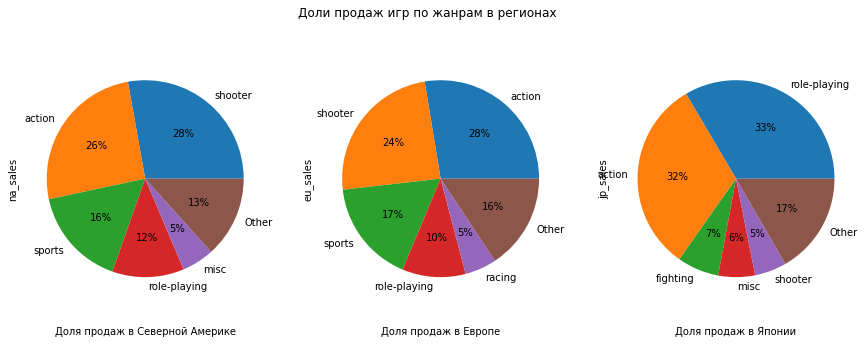

In [89]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax = ax.ravel()
genre_na_top.plot(kind='pie', y='na_sales', legend=False, autopct='%.0f%%', ax = ax[0])
genre_eu_top.plot(kind='pie', y='eu_sales', legend=False, autopct='%.0f%%', ax = ax[1])
genre_jp_top.plot(kind='pie', y='jp_sales', legend=False, autopct='%.0f%%', ax = ax[2])
ax[0].set_xlabel('Доля продаж в Северной Америке', rotation=0, labelpad=25)
ax[1].set_xlabel('Доля продаж в Европе', rotation=0, labelpad=25)
ax[2].set_xlabel('Доля продаж в Японии', rotation=0, labelpad=25)
fig.suptitle('Доли продаж игр по жанрам в регионах')

В Северной Америке наиболее популярными жанрами являются шутер (28%), экшн (26%), спортивный жанр (16%), ролевой жанр (12%) и игры вне категории (5%). В Европе пятью наиболее популярными жанрами являются экшн, шутер, спортивный жанр, ролевой жанр и гоночный жанр; составляя 28%, 24%, 17%, 10% и 5% соответственно. Лидеры по жанрам в Европе практическисовпадают с лидерами в СА, однако в СА шутеры популярнее экшн, тогда как в Европе все наоборот. В Японии самым популярным жанром является ролевой жанр, который составляя 33%, практически вровень с ним идет жанр экшн - 32%. После него идут файтинг, игры вне категориии шутер, составляя 7%, 6% и 5% соответственно.

/tmp/ipykernel_608/3779387645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ot_top.loc['Other', 'other_sales'] = genre_ot.iloc[5:].sum()[0]


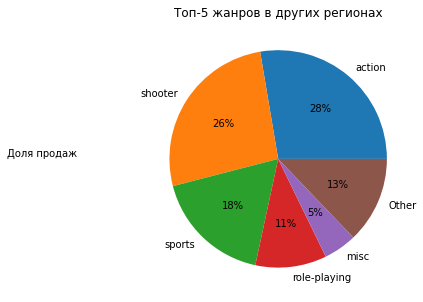

In [92]:
fig,ax=plt.subplots()

genre_ot = data.groupby('genre').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)
genre_ot_top = genre_ot.head()
genre_ot_top.loc['Other', 'other_sales'] = genre_ot.iloc[5:].sum()[0]
genre_ot_top.plot(kind='pie', y='other_sales', legend=False, figsize=(5,5), autopct='%.0f%%', ax=ax)
plt.title('Топ-5 жанров в других регионах')

ax.set_ylabel('Доля продаж', rotation=0, labelpad=100);

В других регионах такая же тенденция, что и на Западе, наиболее популярные игры: шутер, экшн, спортивный жанр, ролевой жанр и игры вне категории.

#### - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [93]:
# check
rating_na = data.groupby('rating').agg({'na_sales':'sum'})
rating_na.iloc[5:]

,na_sales
rating,


In [94]:
# check
genre_ot.iloc[5:]

,other_sales
genre,
racing,2.89
fighting,2.73
adventure,1.82
platform,1.81
simulation,0.89
strategy,0.24
puzzle,0.11


In [95]:
# check
genre_ot

,other_sales
genre,
action,22.57
shooter,21.53
sports,14.36
role-playing,8.64
misc,4.03
racing,2.89
fighting,2.73
adventure,1.82
platform,1.81


In [96]:
rating_na = data.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
rating_na_top = rating_na.head()

In [97]:
rating_eu = data.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
rating_eu_top = rating_eu.head()

In [98]:
rating_jp = data.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
rating_jp_top = rating_jp.head()

Text(0.5, 0.98, 'Доли продаж игр по рейтингу в регионах')

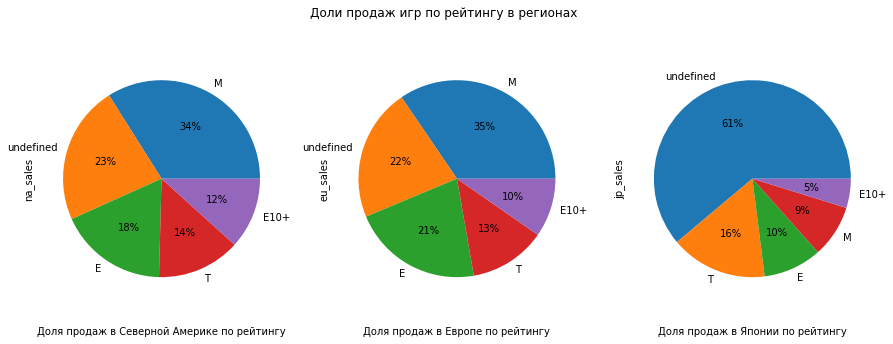

In [99]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax = ax.ravel()
rating_na_top.plot(kind='pie', y='na_sales', legend=False, autopct='%.0f%%', ax = ax[0])
rating_eu_top.plot(kind='pie', y='eu_sales', legend=False, autopct='%.0f%%', ax = ax[1])
rating_jp_top.plot(kind='pie', y='jp_sales', legend=False, autopct='%.0f%%', ax = ax[2])
ax[0].set_xlabel('Доля продаж в Северной Америке по рейтингу', rotation=0, labelpad=25)
ax[1].set_xlabel('Доля продаж в Европе по рейтингу', rotation=0, labelpad=25)
ax[2].set_xlabel('Доля продаж в Японии по рейтингу', rotation=0, labelpad=25)
fig.suptitle('Доли продаж игр по рейтингу в регионах')

Наибольшая доля продаж в СА приходится на игры с рейтингом 17+ (34%), довольно большая доля приходится на игры, рейтинг которых не определен. 18% приходится на игры для всех возрастов, 14% на игры 13+ и 12% на игры 10+. В Европе также самая большая доля продаж приходится на игры с рейтингом 17+. И точно также, как и в СА, в Европе довольно много игр было продано с неопределенным рейтингом (22%). Затем идет такой же порядок рейтинга игр, как и в Северной Америке: игры для всех (21%), игры 13+ (13%)  и игры 10+ (10%). В Японии совсем другая картина. Тут 61% продаж приходится на игры без рейтинга. Это может быть связано с тем, что в Японии своя система оценок от Computer Entertainment Rating Organization (CERO). Далее идут игры 13+ (16%), игры для всех возрастов (10%), игры 17+ (9%) и игры 10+ (5%). 

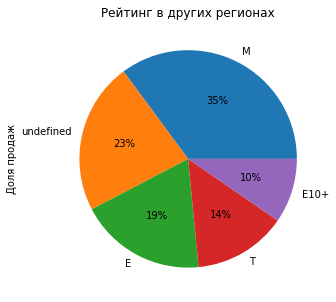

In [100]:
rating_ot = data.groupby('rating').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)
rating_ot_top = rating_ot.head()
rating_ot_top.plot(kind='pie', y='other_sales', legend=False, figsize=(5,5), autopct='%.0f%%')
plt.title('Рейтинг в других регионах')
plt.ylabel('Доля продаж', labelpad=35)
plt.show()

В других регионах тенденция схожа с тенденцией на Западе. Самые популярные игры с рейтингов 17+, потом игры без рейтинга, игры для всех возрастов, игры 13+ и 10+. 

## Шаг 5. Проверьте гипотезы

### - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Задайте самостоятельно пороговое значение alpha.
#### Поясните:
###### - Как вы сформулировали нулевую и альтернативную гипотезы?
###### - Какой критерий применили для проверки гипотез и почему?


In [101]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98


Проверим год релиза платформ. 

In [102]:
data_fresh[data_fresh['Platform'] == 'XOne'].sort_values(by='Year_of_Release')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6878,Zumba Fitness: World Party,XOne,2013.0,Misc,0.17,0.05,0.0,0.02,73.0,6.2,E
2280,NBA 2K14,XOne,2013.0,Sports,0.70,0.11,0.0,0.09,86.0,5.7,E
2956,Need for Speed Rivals,XOne,2013.0,Racing,0.46,0.17,0.0,0.07,75.0,5.8,E10+
11772,Killer Instinct (2013),XOne,2013.0,Fighting,0.04,0.03,0.0,0.01,NaN,NaN,NaN
1959,LEGO Marvel Super Heroes,XOne,2013.0,Action,0.61,0.35,0.0,0.09,NaN,6.8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
10821,Skylanders Imaginators,XOne,2016.0,Platform,0.05,0.04,0.0,0.01,78.0,6,E10+
2768,The Elder Scrolls V: Skyrim,XOne,2016.0,Role-Playing,0.41,0.27,0.0,0.07,NaN,NaN,NaN
10254,Batman: Return to Arkham,XOne,2016.0,Action,0.05,0.05,0.0,0.01,77.0,8.2,T
9813,Farming Simulator 17,XOne,2016.0,Simulation,0.04,0.07,0.0,0.01,65.0,tbd,E


In [103]:
data_fresh[data_fresh['Platform'] == 'PC'].sort_values(by='Year_of_Release', ascending=True)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+
769,SimCity 2000,PC,1992.0,Simulation,1.20,0.84,0.0,0.10,NaN,NaN,NaN
2612,The 7th Guest,PC,1992.0,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T
12650,Syndicate,PC,1992.0,Strategy,0.00,0.05,0.0,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13781,GRID,PC,NaN,Racing,0.00,0.03,0.0,0.01,87.0,7.9,E
14746,Battle vs. Chess,PC,NaN,Misc,0.00,0.02,0.0,0.00,69.0,5.9,T
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.0,0.00,65.0,NaN,RP
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.0,0.00,86.0,8.2,E10+


XOne на рынке с 2013, тогда как PC c 1985. Но наш датасет ограничен 2014 годом, так что в данном случае обе платформы на рынке 3 года. 

In [104]:
data.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [105]:
xbox_score = data.query('platform == "XOne" and user_score.isna() == False')['user_score']
xbox_score

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [106]:
pc_score = data.query('platform == "PC" and user_score.isna() == False')['user_score']
pc_score

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

**Нулевая гипотеза** звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC равны".    
**Альтернативная гипотеза** звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые". 

In [107]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox_score, pc_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


P-value оказалост больше 5%, а именно - 12%, поэтому гипотезу мы не отвергаем. То есть, с вероятностью в 12% можно получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе. Другими словами, хотя средние пользовательские рейтинги платформ Xbox One и PC не одинаковые, с вероятностью в почти 12% такое или большее различие можно получить __случайно.__ 

In [108]:
xbox_score.mean()

6.594545454545456

In [109]:
pc_score.mean()

6.298360655737705

Среднее значение по оценкам пользователей у Xbox One и PC не сильно различаются. 

### - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



In [110]:
data.genre.unique()

array(['shooter', 'action', 'role-playing', 'sports', 'fighting',
       'racing', 'misc', 'platform', 'simulation', 'adventure', 'puzzle',
       'strategy'], dtype=object)

In [111]:
action_score = data.query('genre == "action" and user_score.isna() == False')['user_score']
action_score

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [112]:
sports_score = data.query('genre == "sports" and user_score.isna() == False')['user_score']
sports_score

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

**Нулевая гипотеза** звучит так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые." .    
**Альтернативная гипотеза** звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные.". 

In [113]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_score, sports_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value оказалоось меньше 5%. То есть, с вероятностью меньше 5% можно получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе. Другими словами, средние пользовательские рейтинги жанров Action и Sports не одинаковые, вероятность получить равные или более удаленные значения случайно составляет менее 5%. 

In [115]:
action_score.mean()

6.760606060606061

In [116]:
sports_score.mean()

5.2251968503937

Средние оценки пользователей по спортивному жанру и экшн-жанру не равны. 

В ходе данного этапа был использован t-критерий Стьюдента для независимых выборок, который применяется для сравнения средних значений двух независимых между собой выборок.

## Шаг 6. Напишите общий вывод


Рассмотрим каждый из шагов в данным проекте. 

##### Шаг 1 

На данном этапе работы были получены общие сведения о данных. 

##### Шаг 2

Следующий этап работы был посвящен предобработке данных, в результате чего: 

1. Названия столбцов были приведены к нижнему регистру для удобства проведения дальнейшего исследования. 
2. Данные в некоторых столбцах были преобразованы в нужный тип данных. Например, данные user_score были записаны в виде строк, поэтому были преобразованы в тип float. А годы релиза игр были преобразованы в int. 
3. Были обработаны пропущенные значения в данных. Некоторые строки с пропусками были удалены (название и жанр игр). В случае с user_score значение "tbd" было заменено на пропуск, так как подразмевает то же самое, что и пропуск. В некоторых столбцах (user_score и critic_score) пропущенные значения были оставлены, так как их удаление или приведение к медианному значению могло исказить дальнейший анализ данных. Пропуски в столбце rating были обработаны и заменены на "undefined".
4. Столбцы с названием игры и жанром игр были приведены к нижнему регистру для поиска дубликатов. Явных дубликатов в датасете не найдено. 
5. Был добавлен новый столбец с суммарными продажами. 
    
##### Шаг 3   

В ходе третьего этапа работы был проведен исследовательский анализ данных, в результате чего было выяснено: 

1. Новые платформы для игр выходят примерно каждые 6-10 лет. 
2. Был замечен странный выброс у платформы DS, который был удален. 
3. Платформами с самыми большими суммарными продажами за весь период являются: DS, PS, GBA, PS2, PSP, X360, PS3, Wii, PS4. 
4. Тремя самыми прибыльными за все время платформами являются: PlayStation, Wii, и Xbox. Важно отметить, что у них не только самые высокие продажи, но также у PS И Xbox новые, улучшенные модели выходят довольно часто.

В дальнейшем анализе данные были ограничены по 2014 год. 

4. У PS4, XOne, WiiU, X360 и Wii самое высокое медианное значение по суммарным продажам за последние три года. Однако здесь важно отметить, что X360 на рынке уже 11 лет, так что вряд ли ее можно выдвинуть в ряды многообещающих лидеров. У PS4 и XOne самый большой размах значений, причем датасет скошен вправо, то есть в сторону больших значений. В то же время у данных платформ крайне больших выбросов (в особенности у PS4). В итоге был сделан вывод о том, что наиболее прибыльной и выгодной платформой является PS4.
5. У суммарных продаж и оценок пользователей сравнительно небольшой отрицательный коэффициент корреляции. То есть, чем больше выше пользовательская оценка, тем больше суммарные продажи, и наоборот. Зависимость суммарных продаж от оценки критиков немного выше. У большинства платформ корреляция суммарных продаж с оценками критиков становится тем сильнее, чем выше оценка.То есть высокие оценки вполне могут повлиять на продажи, но утверждать наверняка в данном случае нельзя. Если сравнивать популярные и не популярные платформы, то коэффициент корреляции у них отличается, но не настолько сильно, чтобы можно было выявить какую-либо значимую закономерность.
6. Тремя самыми прибыльными жанрами является шутер, спортивный жанр и платформер. Было также отмечано, что, хотя у жанра экшн довольно маленьких межквартильный размах в сравнении с топ-3 жанрами, у этого жанра огромное количество выбросов больших значений. 


##### Шаг 4

На данном этапе был составлен портрет пользователя каждого региона, в результате чего было сделано несколько выводов:

1. Наиболее популярной платформой в Северной Америке и Европе является PS4. Лидеры платформ в Европе не сильно отличаются от лидеров в Северной Америке, но в Северной Америке X360 популярнее PS3. В Японии бесспорным лидером является 3DS, в отличие от СА и Европы, где лидером является PS4. Однако PS4 в Японии также довольно успешна. 
2. На Западе и в других регионах наиболее популярными жанрами являются: шутер, экшн, спортивный жанр, ролевой жанр. Лидеры по жанрам в Европе практически совпадают с лидерами в СА, однако в СА шутеры популярнее экшн, тогда как в Европе все наоборот. В Японии самым популярным жанром является ролевой жанр, практически вровень с ним идет жанр экшн.
3. Наибольшая доля продаж в СА и Европе приходится на игры с рейтингом 17+. В обеих регионах также довольно много игр было продано с неопределенным рейтингом. В Японии совсем другая картина. Тут большая доля продаж приходится на игры без рейтинга, так как в Японии своя система оценок от Computer Entertainment Rating Organization (CERO).

##### Шаг 5

В ходе последнего этапа были проверены две гипотезы. 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

В результате проверки гипотез было выяснено:

1. Первая гипотеза отвергнута не была, так как с вероятностью в 12% можно получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе. Другими словами, хотя средние пользовательские рейтинги платформ Xbox One и PC не одинаковые, с вероятностью в почти 12% такое или большее различие можно получить случайно.
2. Вторая гипотеза была отвергнута, так как с вероятностью меньше 5% можно получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе. Другими словами, средние пользовательские рейтинги жанров Action и Sports не одинаковые, вероятность получить равные или более удаленные значения случайно составляет менее 5%.